In [1]:
import pandas as pd
import numpy as np
import pprint

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
import pydotplus

In [6]:
df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_DT.csv", encoding='cp949')

In [7]:
df

,전공분류,취업_연구직,취업_기술직,취업_사무직,취업_생산직,취업_영업직,취업_관리직,취업_문화관련직,분야대학원학위요구,대학원에좋지않은인식,...,RA금전적지원여부,RA금전지원자,RA프로젝트참여여부,인턴경험여부,본인학부공부성실도,대학내금전적어려움,대학원홍보물접한여부,취업시석사학력도움여부,전공만족도,석사진학계획
0,실습과 이론이 균형적,3.0,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,0,3,3,0,3,3,0
1,실습과 이론이 균형적,2.0,4,4,3,4,4,4,5,4,...,NaN,NaN,NaN,0,3,3,1,4,4,1
2,실습과 이론이 균형적,3.0,4,5,3,4,4,4,2,3,...,1.0,1.0,0.0,1,3,2,0,3,3,0
3,실습 위주,4.0,4,5,3,1,4,5,2,1,...,NaN,NaN,NaN,0,4,4,0,1,5,1
4,이론 위주,3.0,4,1,4,3,4,3,3,3,...,NaN,NaN,NaN,1,4,2,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,실습 위주,5.0,2,3,2,3,5,3,0,4,...,NaN,NaN,NaN,0,4,2,0,4,5,0
978,이론 위주,4.0,4,2,2,2,4,4,4,2,...,NaN,NaN,NaN,0,3,2,0,4,4,1
979,실습과 이론이 균형적,4.0,4,4,3,2,4,5,2,1,...,NaN,NaN,NaN,1,3,2,0,4,4,1
980,실습과 이론이 균형적,5.0,4,4,1,1,1,5,3,4,...,NaN,NaN,NaN,1,4,3,0,3,3,1


In [8]:
df_=pd.get_dummies(df, columns = ['전공분류','단과대학'])

In [9]:
df_

,취업_연구직,취업_기술직,취업_사무직,취업_생산직,취업_영업직,취업_관리직,취업_문화관련직,분야대학원학위요구,대학원에좋지않은인식,주변의대학원에좋지않은인식,...,석사진학계획,전공분류_실습 위주,전공분류_실습과 이론이 균형적,전공분류_이론 위주,단과대학_공과대학,단과대학_기술경영융합대학,단과대학_에너지바이오대학,단과대학_인문사회대학,단과대학_정보통신대학,단과대학_조형대학
0,3.0,3,3,3,3,3,3,3,3,3,...,0,0,1,0,0,0,1,0,0,0
1,2.0,4,4,3,4,4,4,5,4,3,...,1,0,1,0,0,0,0,0,1,0
2,3.0,4,5,3,4,4,4,2,3,3,...,0,0,1,0,1,0,0,0,0,0
3,4.0,4,5,3,1,4,5,2,1,2,...,1,1,0,0,0,0,0,0,0,1
4,3.0,4,1,4,3,4,3,3,3,3,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,5.0,2,3,2,3,5,3,0,4,3,...,0,1,0,0,0,0,0,0,1,0
978,4.0,4,2,2,2,4,4,4,2,2,...,1,0,0,1,0,0,1,0,0,0
979,4.0,4,4,3,2,4,5,2,1,1,...,1,0,1,0,0,1,0,0,0,0
980,5.0,4,4,1,1,1,5,3,4,4,...,1,0,1,0,0,0,0,1,0,0


In [10]:
df_.to_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot.csv", encoding='cp949')

1번 경우 (ALL1)

In [3]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [4]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [5]:
# 단과대 variable 제거
dt_df__ = dt_df_.drop(['college_gongwa', 'college_gigyeong', 'college_energybio', 'college_inmun', 'college_jeongtong',
                       'college_art'], axis=1)

In [6]:
dt_df__

,major_based_practice,major_practice_theory_balanced,major_based_theory,want_job_RandD,want_job_technical,want_job_office,want_job_produce,want_job_sales,want_job_manager,want_job_culture,...,have_RA_program_or_not,people_around_you_doing_RA,RA_activity_or_not,intern_or_not,sincerity_about_undergraduate_studying,lack_of_money,saw_promotion_of_graduate_school,master_degree_help_get_job,satisfied_with_major,plan_to_enter_graduate_school
0,0,1,0,3,3,3,3,3,3,3,...,1,1,0,0,3,3,0,3,3,0
1,0,1,0,2,4,4,3,4,4,4,...,0,1,0,0,3,3,1,4,4,1
2,0,1,0,3,4,5,3,4,4,4,...,1,1,1,1,3,2,0,3,3,0
3,1,0,0,4,4,5,3,1,4,5,...,0,0,0,0,4,4,0,1,5,1
4,0,0,1,3,4,1,4,3,4,3,...,1,1,0,1,4,2,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,0,0,5,2,3,2,3,5,3,...,0,0,0,0,4,2,0,4,5,0
978,0,0,1,4,4,2,2,2,4,4,...,0,0,0,0,3,2,0,4,4,1
979,0,1,0,4,4,4,3,2,4,5,...,0,0,0,1,3,2,0,4,4,1
980,0,1,0,5,4,4,1,1,1,5,...,0,0,0,1,4,3,0,3,3,1


In [7]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school'])
y = np.array(dt_df__['plan_to_enter_graduate_school'])

In [8]:
X

array([[0, 1, 0, ..., 0, 3, 3],
       [0, 1, 0, ..., 1, 4, 4],
       [0, 1, 0, ..., 0, 3, 3],
       ...,
       [0, 1, 0, ..., 0, 4, 4],
       [0, 1, 0, ..., 0, 3, 3],
       [0, 0, 1, ..., 0, 4, 4]], dtype=int64)

In [9]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
X_train

array([[0, 1, 0, ..., 1, 4, 4],
       [1, 0, 0, ..., 0, 4, 5],
       [1, 0, 0, ..., 1, 5, 4],
       ...,
       [0, 1, 0, ..., 0, 1, 5],
       [0, 1, 0, ..., 0, 2, 4],
       [0, 1, 0, ..., 0, 3, 3]], dtype=int64)

In [12]:
max_depth = 5
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf)

In [13]:
dt_clf = dt_clf.fit(X_train, y_train)

In [15]:
dt_prediction = dt_clf.predict(X_test)

In [16]:
dt_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [18]:
feature_names = dt_df__.columns.tolist()

In [19]:
len(feature_names)

37

In [20]:
feature_names.remove('plan_to_enter_graduate_school')

In [21]:
len(feature_names)

36

In [24]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

In [25]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [26]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

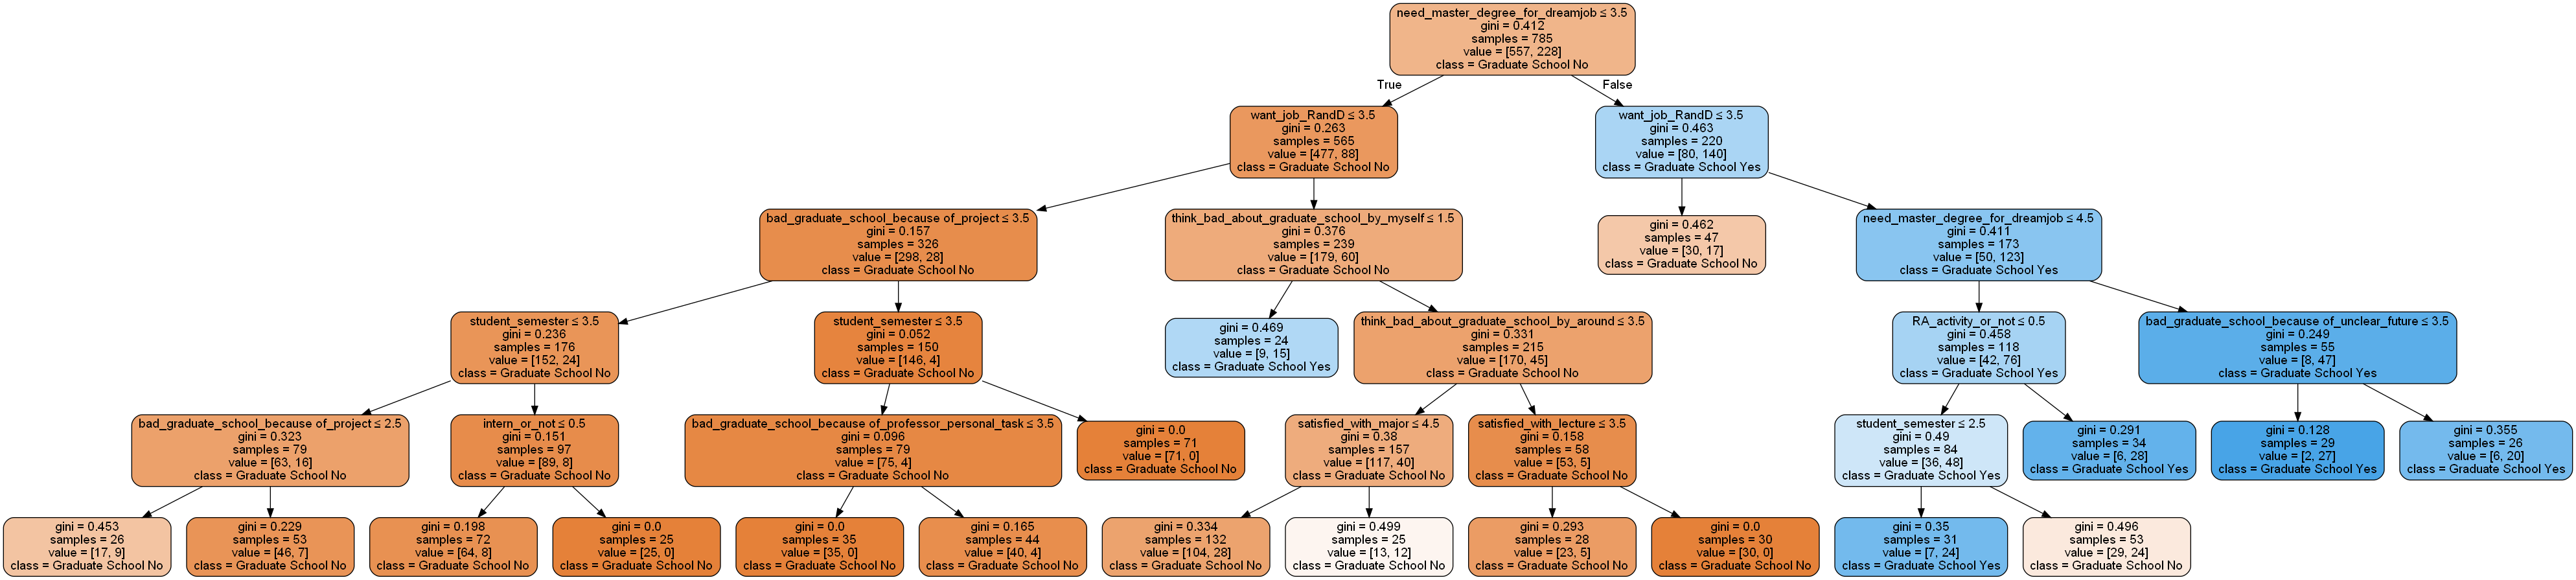

In [27]:
Image(dt_graph.create_png())

In [28]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))

Accuracy is:  0.7563451776649747


In [29]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))

Accuracy is:  0.7563451776649747
Precision is: 0.4426229508196721
Recall is: 0.6585365853658537
F-1 score is: 0.7718885621142275
Confusion matrix: [[122  34]
 [ 14  27]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       156
           1       0.44      0.66      0.53        41

    accuracy                           0.76       197
   macro avg       0.67      0.72      0.68       197
weighted avg       0.80      0.76      0.77       197



In [27]:
# Logistic Regression에서 변수 비교를 위한 DT에서의 변수 중요도
feature_imp=dt_clf.feature_importances_
print(feature_imp)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41131526e-01
 0.00000000e+00 0.00000000e+00 5.34323208e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.85556286e-01 5.96434574e-02
 8.45440311e-03 0.00000000e+00 1.80496167e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.25975688e-02
 0.00000000e+00 1.39295779e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.97436289e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.21288778e-02]


In [29]:
feature_imp_all1 = { name:value for name, value in zip(feature_names, feature_imp) }

In [30]:
feature_imp_all1

{'major_based_practice': 0.0,
 'major_practice_theory_balanced': 0.0,
 'major_based_theory': 0.0,
 'want_job_RandD': 0.14113152596090947,
 'want_job_technical': 0.0,
 'want_job_office': 0.0,
 'want_job_produce': 0.0005343232079630197,
 'want_job_sales': 0.0,
 'want_job_manager': 0.0,
 'want_job_culture': 0.0,
 'need_master_degree_for_dreamjob': 0.6855562861912564,
 'think_bad_about_graduate_school_by_myself': 0.05964345735127806,
 'think_bad_about_graduate_school_by_around': 0.008454403114534464,
 'bad_graduate_school_because of_tuition': 0.0,
 'bad_graduate_school_because of_research': 0.018049616720272853,
 'bad_graduate_school_because of_project': 0.0,
 'bad_graduate_school_because of_personal_time': 0.0,
 'bad_graduate_school_because of_impersonal': 0.0,
 'bad_graduate_school_because of_professor_personal_task': 0.0,
 'bad_graduate_school_because of_unclear_future': 0.012597568810216593,
 'satisfied_with_lecture': 0.0,
 'advice_by_professor': 0.013929577909903559,
 'satisfied_with_

2번 경우 (FS)

In [66]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [67]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [68]:
# 전체 변수에서 feature selection만 수행
selected_feature = ['need_master_degree_for_dreamjob', 'want_job_RandD', 'master_degree_help_get_job', 'advice_by_professor', 
                    'think_bad_about_graduate_school_by_myself', 'bad_graduate_school_because of_project', 'satisfied_with_major', 
                    'satisfied_with_lecture', 'RA_activity_or_not', 'want_job_sales', 'saw_promotion_of_graduate_school', 
                    'want_job_technical'
                   ]

In [69]:
len(selected_feature)

12

In [70]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df_[selected_feature])
y = np.array(dt_df_['plan_to_enter_graduate_school'])

In [71]:
X

array([[3, 3, 3, ..., 3, 0, 3],
       [5, 2, 4, ..., 4, 1, 4],
       [2, 3, 3, ..., 4, 0, 4],
       ...,
       [2, 4, 4, ..., 2, 0, 4],
       [3, 5, 3, ..., 1, 0, 4],
       [2, 3, 4, ..., 1, 0, 4]], dtype=int64)

In [72]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
X_train

array([[4, 4, 3, ..., 1, 1, 5],
       [4, 4, 4, ..., 3, 0, 4],
       [2, 5, 2, ..., 1, 1, 5],
       ...,
       [2, 3, 3, ..., 4, 0, 4],
       [3, 4, 4, ..., 2, 0, 3],
       [3, 4, 4, ..., 1, 1, 4]], dtype=int64)

In [75]:
max_depth = 5
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf)

In [76]:
dt_clf = dt_clf.fit(X_train, y_train)

In [43]:
dt_prediction = dt_clf.predict(X_test)

In [44]:
dt_prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [59]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [60]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

In [61]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = selected_feature, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [62]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

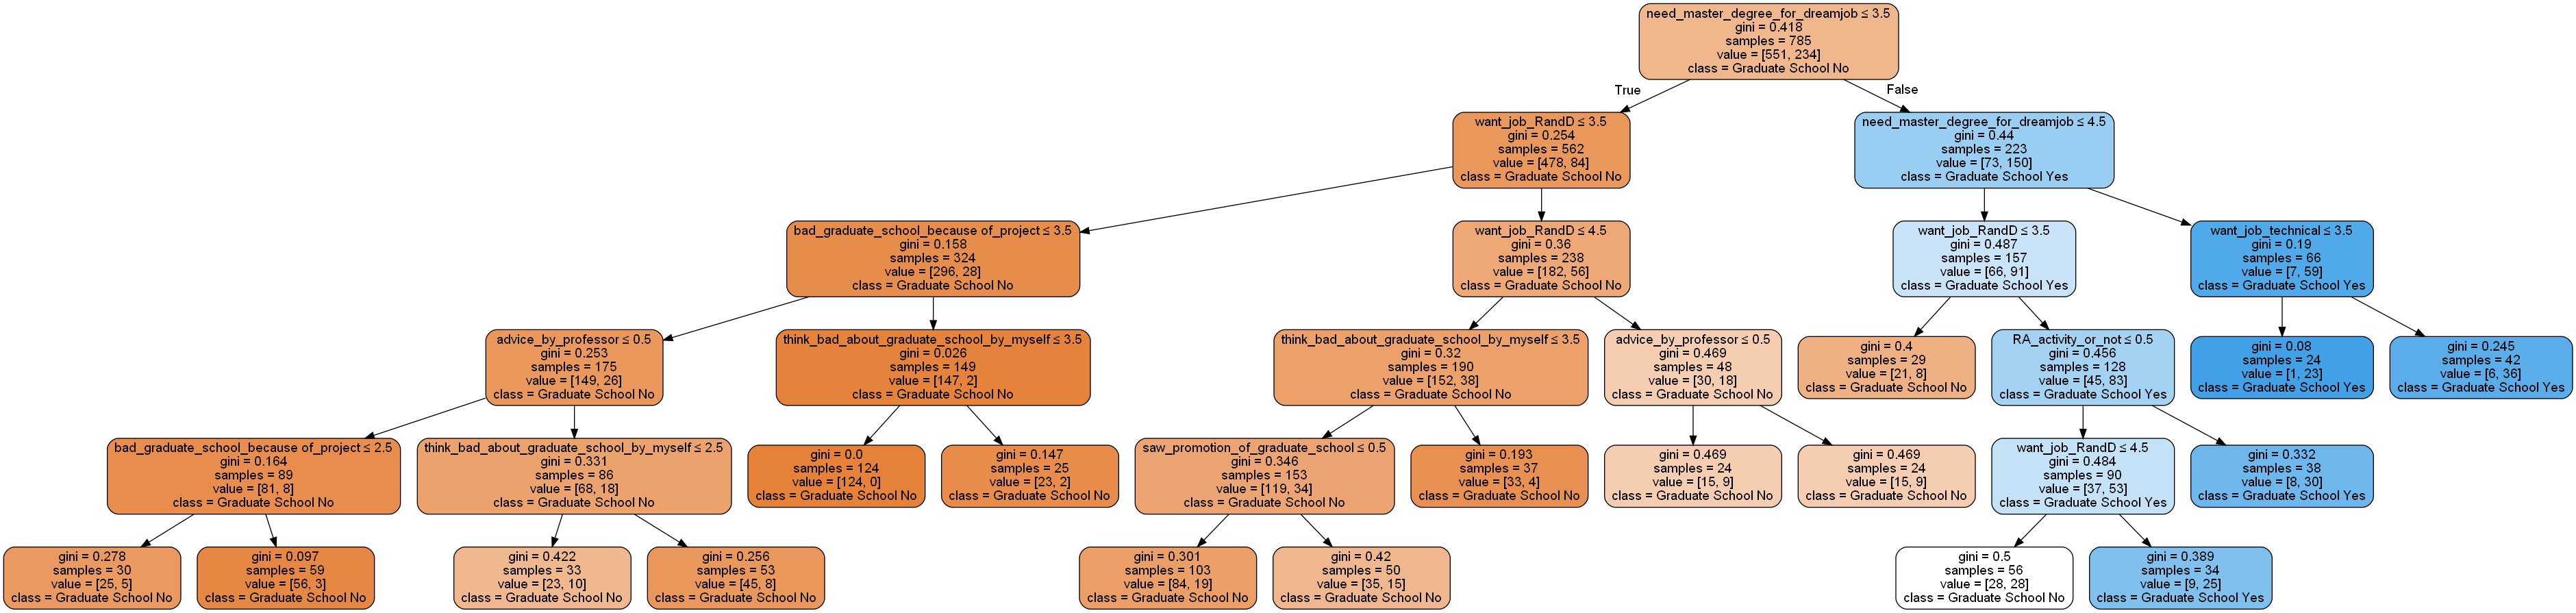

In [63]:
Image(dt_graph.create_png())

In [64]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))


Accuracy is:  0.751269035532995
Precision is: 0.32727272727272727
Recall is: 0.6
F-1 score is: 0.7777851863233096
Confusion matrix: [[130  37]
 [ 12  18]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       167
           1       0.33      0.60      0.42        30

    accuracy                           0.75       197
   macro avg       0.62      0.69      0.63       197
weighted avg       0.83      0.75      0.78       197



In [65]:
case2_df=pd.DataFrame({'Accuracy':accuracy_score(dt_prediction, y_test), 'Precision':precision_score(dt_prediction, y_test), 
                      'Recall':recall_score(dt_prediction, y_test), 'F-1 score':f1_score(dt_prediction, y_test, average='weighted')}, 
                     index=['value'])
case2_df

,Accuracy,Precision,Recall,F-1 score
value,0.751269,0.327273,0.6,0.777785


In [45]:
# Logistic Regression에서 변수 비교를 위한 DT에서의 변수 중요도
feature_imp=dt_clf.feature_importances_
print(feature_imp)

[0.62423614 0.19541911 0.         0.0231436  0.09057248 0.02532475
 0.03896852 0.0023354  0.         0.         0.         0.        ]


In [77]:
feature_imp_fs = { name:value for name, value in zip(selected_feature, feature_imp) }

In [78]:
feature_imp_fs

{'need_master_degree_for_dreamjob': 0.6242361394728035,
 'want_job_RandD': 0.19541910777989613,
 'master_degree_help_get_job': 0.0,
 'advice_by_professor': 0.023143603584236644,
 'think_bad_about_graduate_school_by_myself': 0.09057248050415011,
 'bad_graduate_school_because of_project': 0.025324754939655723,
 'satisfied_with_major': 0.038968515060976885,
 'satisfied_with_lecture': 0.0023353986582809183,
 'RA_activity_or_not': 0.0,
 'want_job_sales': 0.0,
 'saw_promotion_of_graduate_school': 0.0,
 'want_job_technical': 0.0}

3번 경우 (ALL2)

In [266]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [267]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [268]:
# Dominant variable 및 관련없는 변수 제거 (석사학위요구, 희망취업분야, 단과대학 제거)
dt_df__ = dt_df_.drop(['need_master_degree_for_dreamjob', 'want_job_RandD', 'want_job_technical', 'want_job_office', 
                       'want_job_produce', 'want_job_sales', 'want_job_manager', 'want_job_culture','college_gongwa',
                       'college_gigyeong', 'college_energybio', 'college_inmun', 'college_jeongtong', 'college_art'], axis=1)

In [269]:
dt_df__

,major_based_practice,major_practice_theory_balanced,major_based_theory,think_bad_about_graduate_school_by_myself,think_bad_about_graduate_school_by_around,bad_graduate_school_because of_tuition,bad_graduate_school_because of_research,bad_graduate_school_because of_project,bad_graduate_school_because of_personal_time,bad_graduate_school_because of_impersonal,...,have_RA_program_or_not,people_around_you_doing_RA,RA_activity_or_not,intern_or_not,sincerity_about_undergraduate_studying,lack_of_money,saw_promotion_of_graduate_school,master_degree_help_get_job,satisfied_with_major,plan_to_enter_graduate_school
0,0,1,0,3,3,3,3,3,3,3,...,1,1,0,0,3,3,0,3,3,0
1,0,1,0,4,3,2,4,4,4,4,...,0,1,0,0,3,3,1,4,4,1
2,0,1,0,3,3,2,2,3,3,2,...,1,1,1,1,3,2,0,3,3,0
3,1,0,0,1,2,2,1,2,2,2,...,0,0,0,0,4,4,0,1,5,1
4,0,0,1,3,3,1,1,1,1,1,...,1,1,0,1,4,2,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,0,0,4,3,3,3,3,3,3,...,0,0,0,0,4,2,0,4,5,0
978,0,0,1,2,2,3,3,3,4,4,...,0,0,0,0,3,2,0,4,4,1
979,0,1,0,1,1,1,1,1,1,1,...,0,0,0,1,3,2,0,4,4,1
980,0,1,0,4,4,4,3,3,3,3,...,0,0,0,1,4,3,0,3,3,1


In [270]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school'])
y = np.array(dt_df__['plan_to_enter_graduate_school'])

In [271]:
X

array([[0, 1, 0, ..., 0, 3, 3],
       [0, 1, 0, ..., 1, 4, 4],
       [0, 1, 0, ..., 0, 3, 3],
       ...,
       [0, 1, 0, ..., 0, 4, 4],
       [0, 1, 0, ..., 0, 3, 3],
       [0, 0, 1, ..., 0, 4, 4]], dtype=int64)

In [272]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [274]:
X_train

array([[0, 1, 0, ..., 0, 1, 5],
       [0, 0, 1, ..., 0, 2, 4],
       [0, 1, 0, ..., 1, 5, 5],
       ...,
       [0, 1, 0, ..., 0, 4, 5],
       [0, 1, 0, ..., 0, 3, 3],
       [0, 1, 0, ..., 0, 4, 3]], dtype=int64)

In [275]:
max_depth = 5
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf)

In [276]:
dt_clf = dt_clf.fit(X_train, y_train)

In [277]:
dt_prediction = dt_clf.predict(X_test)

In [278]:
dt_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [111]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [145]:
feature_names = dt_df__.columns.tolist()

In [146]:
len(feature_names)

29

In [147]:
feature_names.remove('plan_to_enter_graduate_school')

In [148]:
len(feature_names)

28

In [48]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

In [49]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [50]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

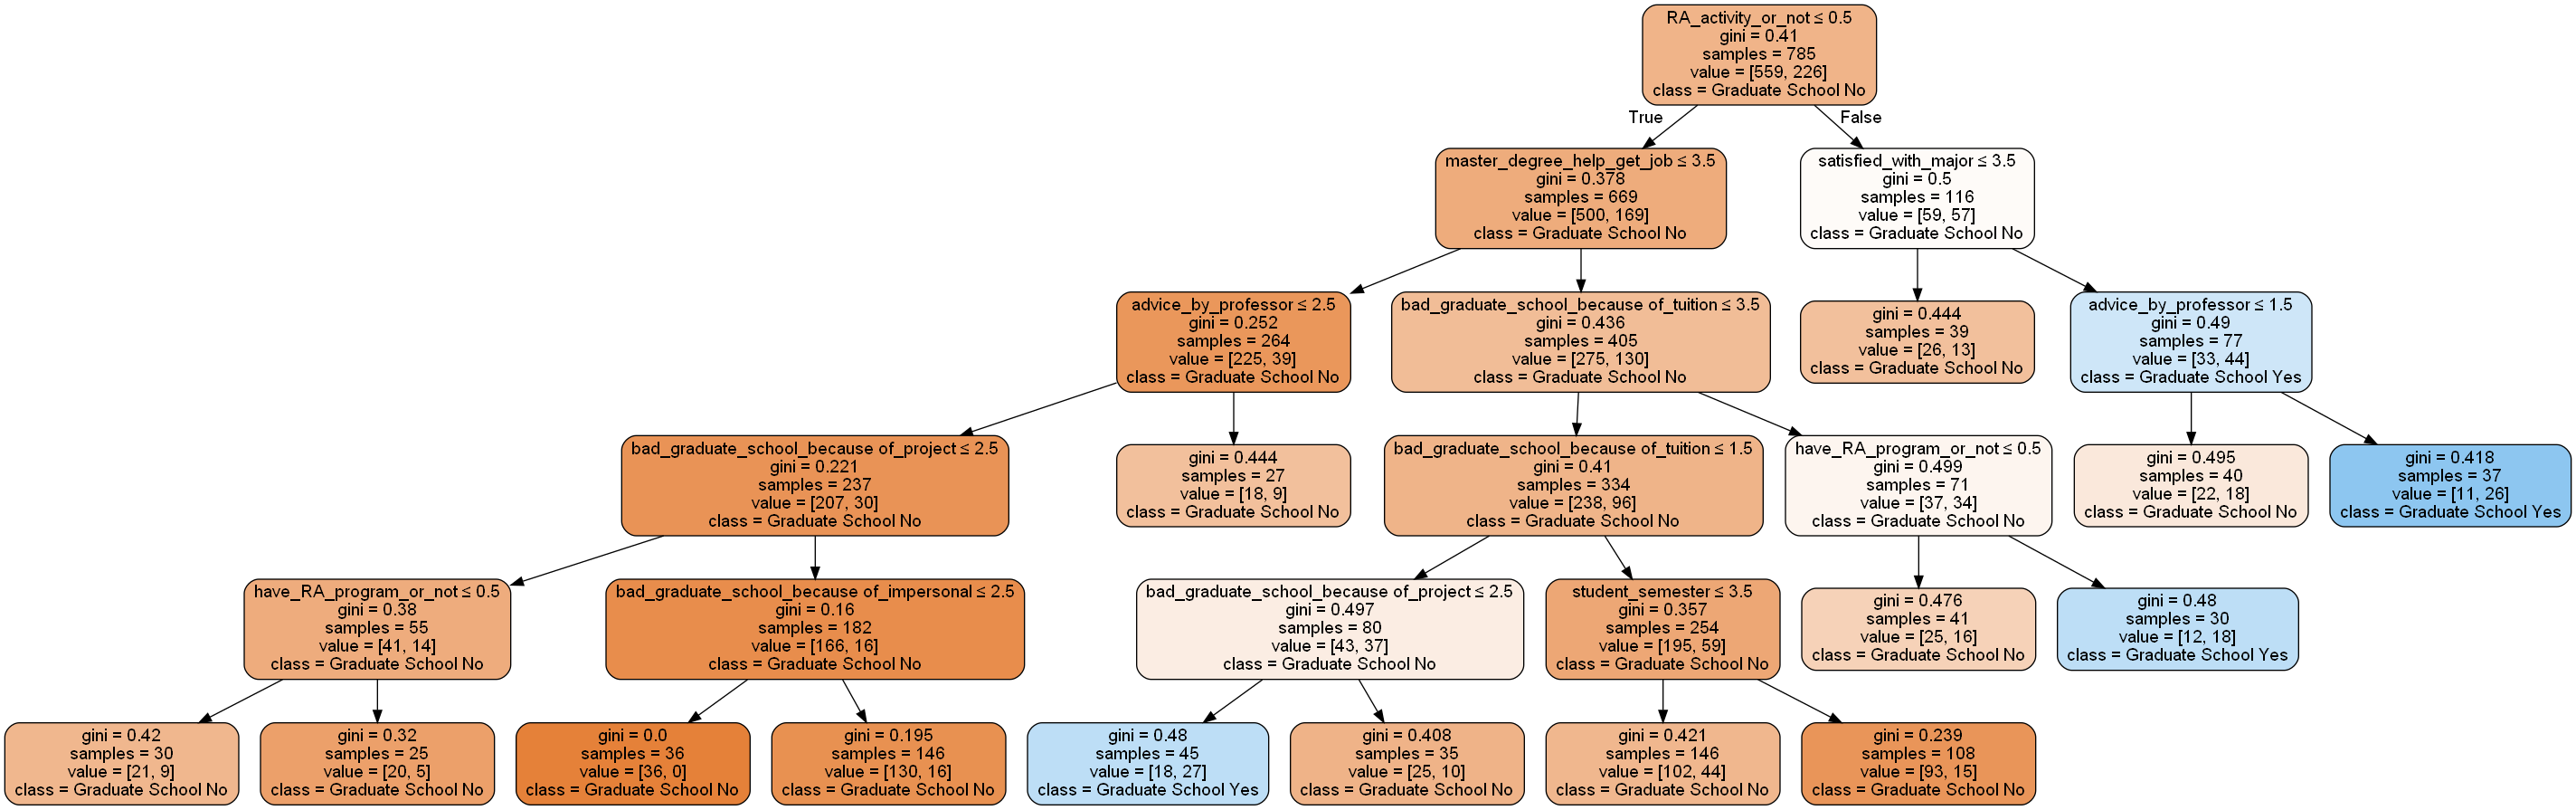

In [51]:
Image(dt_graph.create_png())

In [52]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))

Accuracy is:  0.649746192893401


In [53]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))

Accuracy is:  0.649746192893401
Precision is: 0.23809523809523808
Recall is: 0.4166666666666667
F-1 score is: 0.6814795116266338
Confusion matrix: [[113  48]
 [ 21  15]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       161
           1       0.24      0.42      0.30        36

    accuracy                           0.65       197
   macro avg       0.54      0.56      0.53       197
weighted avg       0.73      0.65      0.68       197



In [279]:
# Logistic Regression에서 변수 비교를 위한 DT에서의 변수 중요도
feature_imp=dt_clf.feature_importances_
print(feature_imp)

[0.         0.         0.         0.03698493 0.         0.
 0.         0.12335895 0.         0.01237684 0.         0.07759585
 0.         0.14986473 0.         0.         0.         0.
 0.         0.         0.         0.26650816 0.         0.
 0.         0.         0.24210174 0.0912088 ]


In [280]:
feature_imp_all3 = { name:value for name, value in zip(feature_names, feature_imp) }

In [281]:
feature_imp_all3

{'major_based_practice': 0.0,
 'major_practice_theory_balanced': 0.0,
 'major_based_theory': 0.0,
 'think_bad_about_graduate_school_by_myself': 0.03698492861081662,
 'think_bad_about_graduate_school_by_around': 0.0,
 'bad_graduate_school_because of_tuition': 0.0,
 'bad_graduate_school_because of_research': 0.0,
 'bad_graduate_school_because of_project': 0.12335895219873083,
 'bad_graduate_school_because of_personal_time': 0.0,
 'bad_graduate_school_because of_impersonal': 0.01237683539658197,
 'bad_graduate_school_because of_professor_personal_task': 0.0,
 'bad_graduate_school_because of_unclear_future': 0.07759584721747025,
 'satisfied_with_lecture': 0.0,
 'advice_by_professor': 0.14986473267156605,
 'satisfied_with_scholarship': 0.0,
 'satisfied_with_curriculum': 0.0,
 'have_professor_from_own_graduate_school': 0.0,
 'have_professor_from_own_undergraduate_school': 0.0,
 'student_semester': 0.0,
 'have_RA_program_or_not': 0.0,
 'people_around_you_doing_RA': 0.0,
 'RA_activity_or_not':

major_based_practice = 0.012986306567796523
major_practice_theory_balanced = 0.017265830500583924
major_based_theory = 0.016588406366926742
think_bad_about_graduate_school_by_myself = 0.05063076211470784
think_bad_about_graduate_school_by_around = 0.042873015105329065
bad_graduate_school_because of_tuition = 0.046143045445027786
bad_graduate_school_because of_research = 0.038302532261163695
bad_graduate_school_because of_project = 0.0369639793833016
bad_graduate_school_because of_personal_time = 0.039736449043609234
bad_graduate_school_because of_impersonal = 0.03638628158698905
bad_graduate_school_because of_professor_personal_task = 0.04061495382281549
bad_graduate_school_because of_unclear_future = 0.04475519348588079
satisfied_with_lecture = 0.04458944527260896
advice_by_professor = 0.06319263780884714
satisfied_with_scholarship = 0.04787587831635912
satisfied_with_curriculum = 0.040977231369627144
have_professor_from_own_graduate_school = 0.011556532001677245
have_professor_from_o

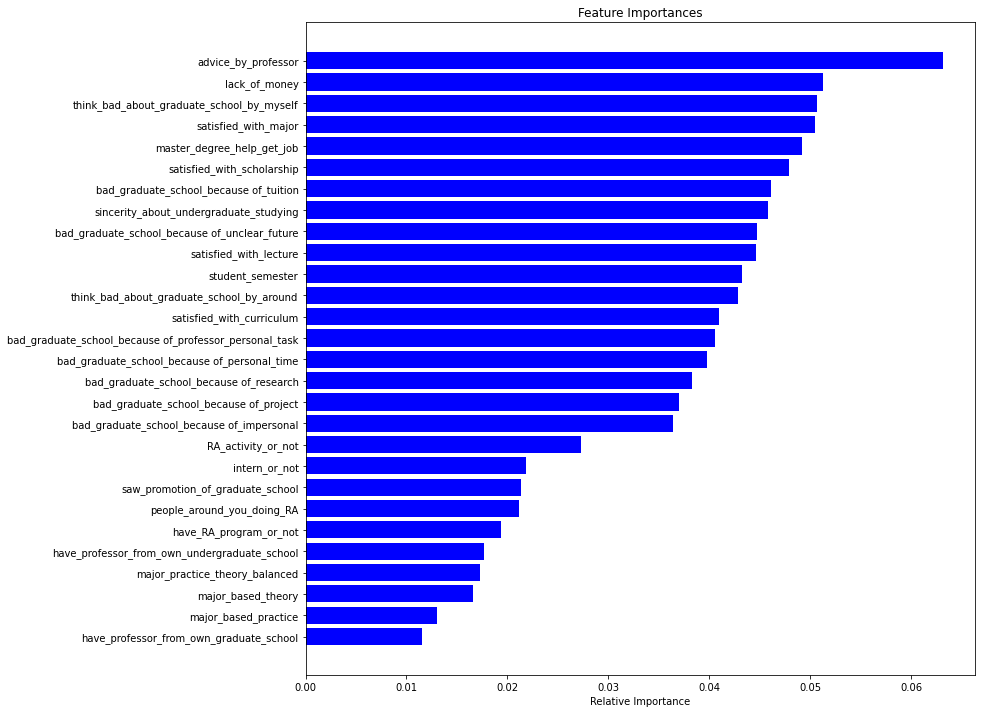

In [94]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(feature_names, rnd_clf.feature_importances_):
    print(name, "=", importance)

features = feature_names
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [95]:
X = dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school']
y = dt_df__['plan_to_enter_graduate_school']

In [96]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, len(feature_names))
print(str(len(cor_feature)), 'selected features')

28 selected features


In [97]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=len(feature_names))
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

18 selected features


In [98]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(feature_names))
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

12 selected features


In [99]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_names, 'Pearson':cor_support,
                                     'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(feature_names))

,Feature,Pearson,Random Forest,LightGBM,Total
1,think_bad_about_graduate_school_by_myself,True,True,True,3
2,student_semester,True,True,True,3
3,sincerity_about_undergraduate_studying,True,True,True,3
4,satisfied_with_major,True,True,True,3
5,master_degree_help_get_job,True,True,True,3
6,lack_of_money,True,True,True,3
7,bad_graduate_school_because of_unclear_future,True,True,True,3
8,bad_graduate_school_because of_tuition,True,True,True,3
9,bad_graduate_school_because of_project,True,True,True,3
10,bad_graduate_school_because of_impersonal,True,True,True,3


In [1]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

NameError: name 'pd' is not defined

In [5]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [6]:
selected_feature = ['need_master_degree_for_dreamjob', 'want_job_RandD', 'RA_activity_or_not', 'satisfied_with_major', 
                    'master_degree_help_get_job', 'advice_by_professor', 'bad_graduate_school_because of_research', 
                    'bad_graduate_school_because of_project', 'people_around_you_doing_RA', 
                    'think_bad_about_graduate_school_by_myself', 'satisfied_with_lecture'
                   ]

In [7]:
len(selected_feature)

8

In [8]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df_[selected_feature])
y = np.array(dt_df_['plan_to_enter_graduate_school'])

In [9]:
X

array([[3, 4, 3, ..., 3, 3, 3],
       [4, 4, 3, ..., 4, 4, 3],
       [3, 4, 2, ..., 3, 3, 4],
       ...,
       [4, 1, 2, ..., 4, 4, 4],
       [3, 4, 3, ..., 3, 3, 3],
       [4, 4, 3, ..., 4, 4, 3]], dtype=int64)

In [10]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
X_train

array([[2, 4, 2, ..., 3, 3, 3],
       [4, 4, 3, ..., 3, 3, 3],
       [4, 4, 4, ..., 4, 2, 1],
       ...,
       [4, 4, 4, ..., 5, 4, 4],
       [3, 4, 2, ..., 4, 4, 4],
       [4, 4, 2, ..., 5, 4, 4]], dtype=int64)

In [13]:
max_depth = 5
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf)

In [14]:
dt_clf = dt_clf.fit(X_train, y_train)

In [15]:
dt_prediction = dt_clf.predict(X_test)

In [16]:
dt_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [17]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [18]:
len(selected_feature)

8

In [19]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

In [20]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = selected_feature, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [21]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

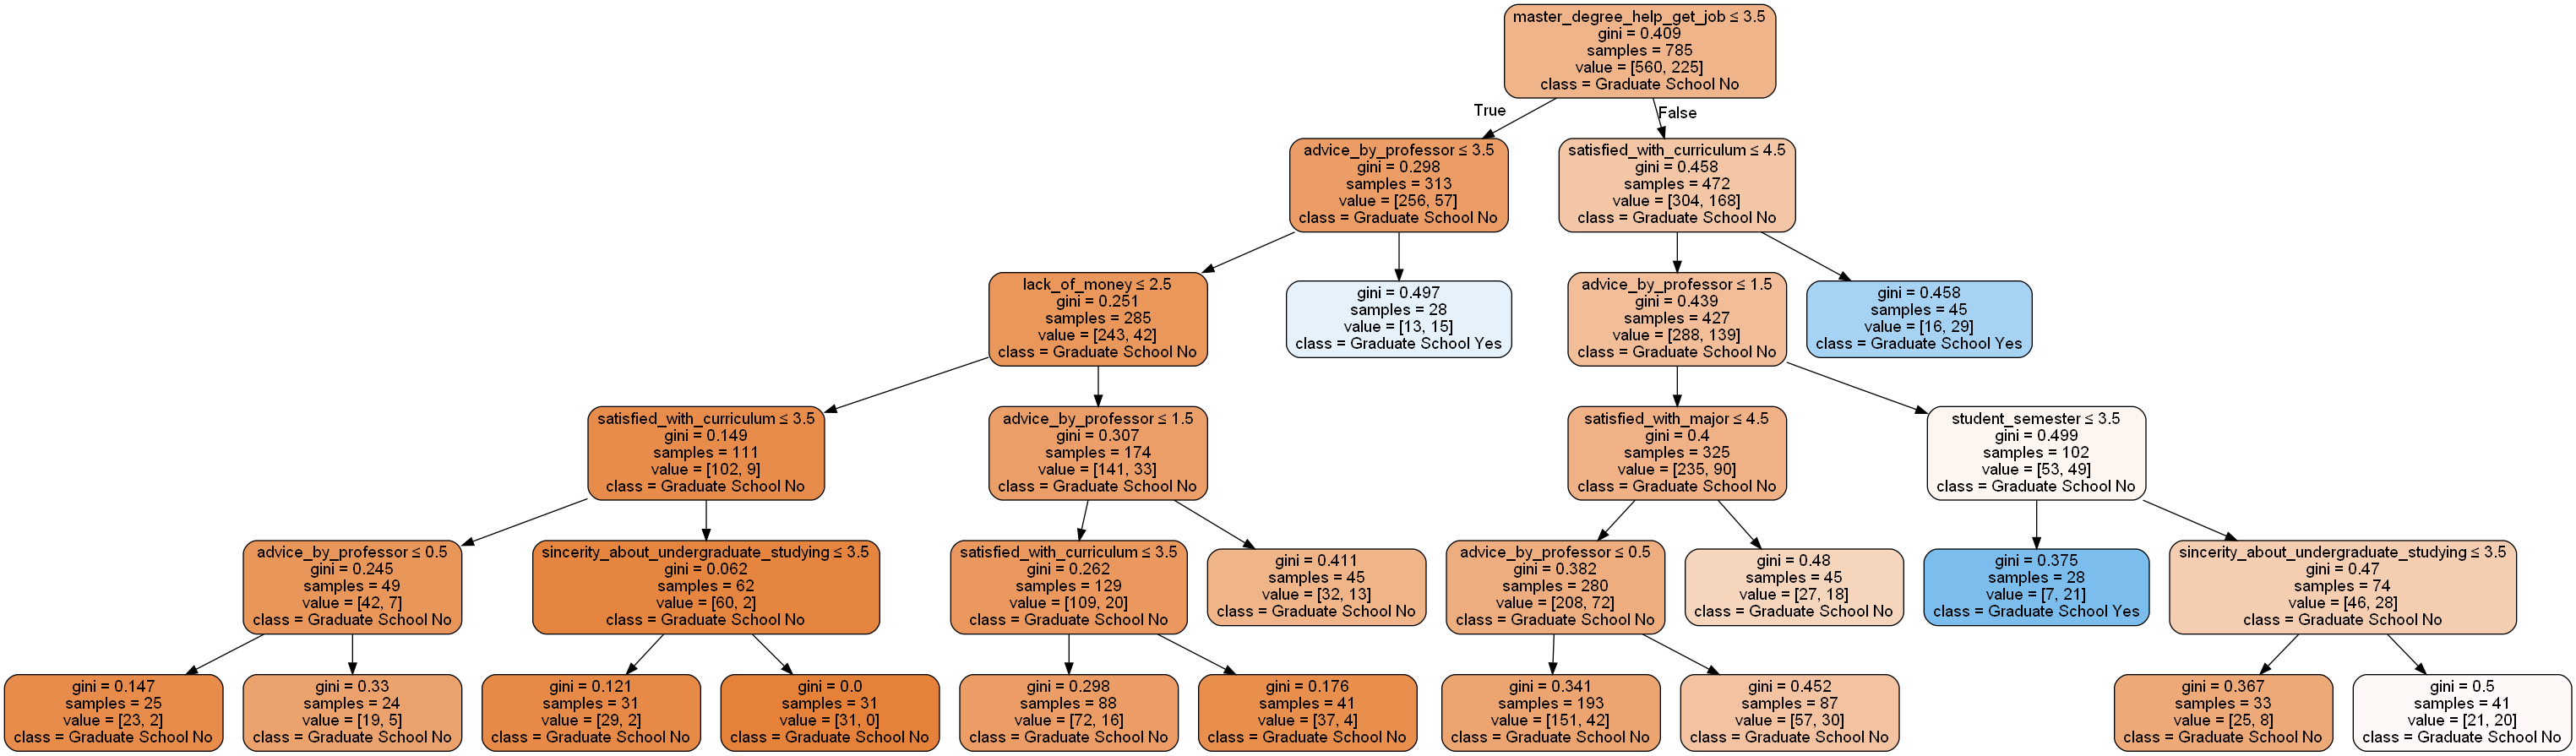

In [22]:
Image(dt_graph.create_png())

In [23]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))

Accuracy is:  0.6649746192893401


In [24]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))

Accuracy is:  0.6649746192893401
Precision is: 0.15625
Recall is: 0.45454545454545453
F-1 score is: 0.7239405028922203
Confusion matrix: [[121  54]
 [ 12  10]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       175
           1       0.16      0.45      0.23        22

    accuracy                           0.66       197
   macro avg       0.53      0.57      0.51       197
weighted avg       0.83      0.66      0.72       197



In [57]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [58]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [59]:
# Dominant variable 제거 (석사학위요구, R&D 취업 희망)
dt_df__ = dt_df_.drop(['need_master_degree_for_dreamjob', 'want_job_RandD', 'think_bad_about_graduate_school_by_myself', 'master_degree_help_get_job', 'bad_graduate_school_because of_project', 
                    'want_job_sales', 'want_job_produce', 'want_job_manager', 'want_job_culture', 'want_job_technical', 'student_semester', 
                    'bad_graduate_school_because of_tuition', 'advice_by_professor', 'want_job_office', 
                    'satisfied_with_major', 'satisfied_with_lecture', 'bad_graduate_school_because of_impersonal', 
                    'bad_graduate_school_because of_professor_personal_task', 'bad_graduate_school_because of_unclear_future',
                    'satisfied_with_curriculum', 'bad_graduate_school_because of_research', 'bad_graduate_school_because of_personal_time'], axis=1)

In [60]:
dt_df__

,major_based_practice,major_practice_theory_balanced,major_based_theory,college_gongwa,college_gigyeong,college_energybio,college_inmun,college_jeongtong,college_art,think_bad_about_graduate_school_by_around,...,have_professor_from_own_graduate_school,have_professor_from_own_undergraduate_school,have_RA_program_or_not,people_around_you_doing_RA,RA_activity_or_not,intern_or_not,sincerity_about_undergraduate_studying,lack_of_money,saw_promotion_of_graduate_school,plan_to_enter_graduate_school
0,0,1,0,0,0,1,0,0,0,3,...,0,0,1,1,0,0,3,3,0,0
1,0,1,0,0,0,0,0,1,0,3,...,0,0,0,1,0,0,3,3,1,1
2,0,1,0,1,0,0,0,0,0,3,...,0,0,1,1,1,1,3,2,0,0
3,1,0,0,0,0,0,0,0,1,2,...,1,1,0,0,0,0,4,4,0,1
4,0,0,1,1,0,0,0,0,0,3,...,0,1,1,1,0,1,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,0,0,0,0,0,0,1,0,3,...,1,0,0,0,0,0,4,2,0,0
978,0,0,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,3,2,0,1
979,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,3,2,0,1
980,0,1,0,0,0,0,1,0,0,4,...,0,0,0,0,0,1,4,3,0,1


In [61]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school'])
y = np.array(dt_df__['plan_to_enter_graduate_school'])

In [62]:
X

array([[0, 1, 0, ..., 3, 3, 0],
       [0, 1, 0, ..., 3, 3, 1],
       [0, 1, 0, ..., 3, 2, 0],
       ...,
       [0, 1, 0, ..., 3, 2, 0],
       [0, 1, 0, ..., 4, 3, 0],
       [0, 0, 1, ..., 5, 3, 0]], dtype=int64)

In [63]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [65]:
X_train

array([[0, 1, 0, ..., 2, 3, 0],
       [0, 0, 1, ..., 4, 4, 0],
       [0, 1, 0, ..., 4, 2, 1],
       ...,
       [0, 1, 0, ..., 3, 2, 1],
       [0, 1, 0, ..., 3, 2, 0],
       [0, 1, 0, ..., 3, 3, 0]], dtype=int64)

In [66]:
max_depth = 5
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf)

In [67]:
dt_clf = dt_clf.fit(X_train, y_train)

In [68]:
dt_prediction = dt_clf.predict(X_test)

In [69]:
dt_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [70]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [71]:
feature_names = dt_df__.columns.tolist()

In [72]:
len(feature_names)

21

In [73]:
feature_names.remove('plan_to_enter_graduate_school')

In [74]:
len(feature_names)

20

In [68]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

In [69]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [70]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

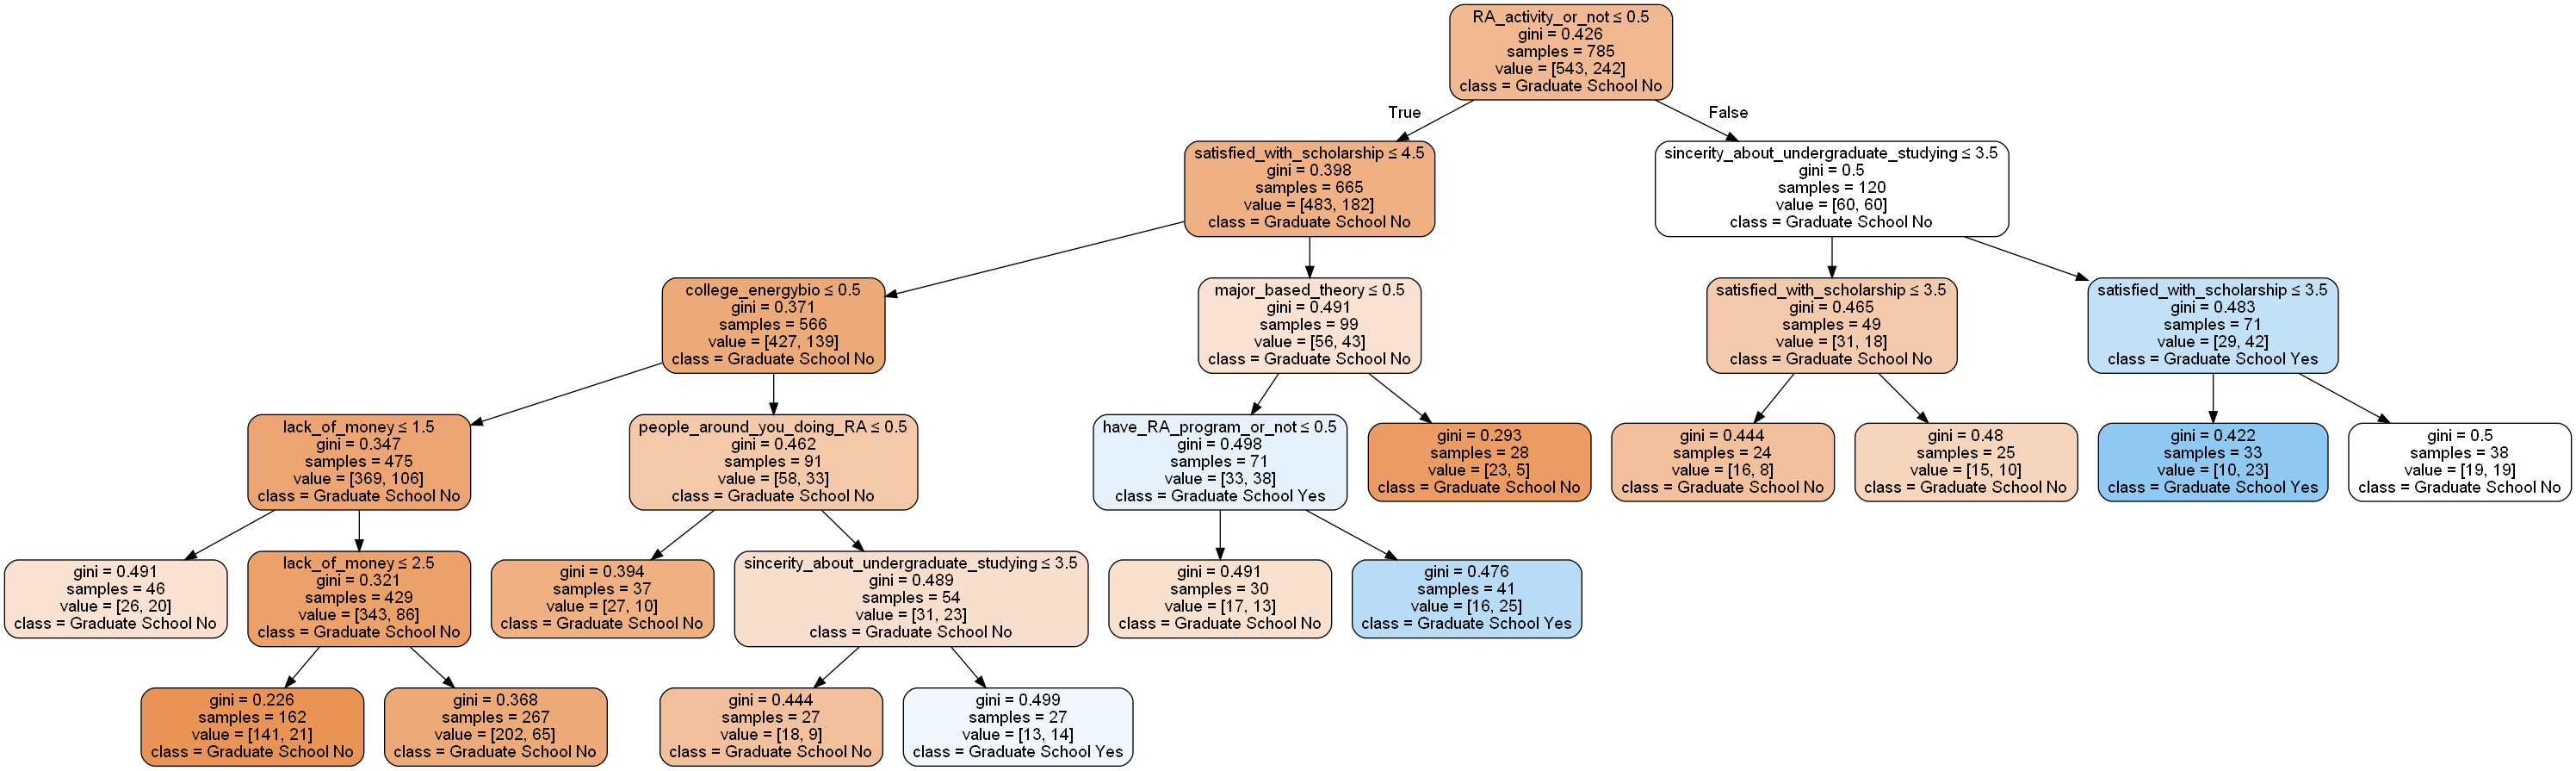

In [71]:
Image(dt_graph.create_png())

In [72]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))

Accuracy is:  0.6954314720812182


In [73]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))

Accuracy is:  0.6954314720812182
Precision is: 0.19148936170212766
Recall is: 0.2903225806451613
F-1 score is: 0.7189586741729646
Confusion matrix: [[128  38]
 [ 22   9]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       166
           1       0.19      0.29      0.23        31

    accuracy                           0.70       197
   macro avg       0.52      0.53      0.52       197
weighted avg       0.75      0.70      0.72       197



major_based_practice = 0.018227127684827187
major_practice_theory_balanced = 0.02825024251076841
major_based_theory = 0.02545668521421418
college_gongwa = 0.03484239348378646
college_gigyeong = 0.020324042787110648
college_energybio = 0.027447811437185384
college_inmun = 0.01507423431740014
college_jeongtong = 0.0281463924519494
college_art = 0.010976647076615604
think_bad_about_graduate_school_by_around = 0.12828598071428043
satisfied_with_scholarship = 0.13489937465214108
have_professor_from_own_graduate_school = 0.023087572124069703
have_professor_from_own_undergraduate_school = 0.03406716216747666
have_RA_program_or_not = 0.04835764747312848
people_around_you_doing_RA = 0.04159965696882385
RA_activity_or_not = 0.044490320325661546
intern_or_not = 0.040830450107753685
sincerity_about_undergraduate_studying = 0.11049958887264794
lack_of_money = 0.1389269697783219
saw_promotion_of_graduate_school = 0.046209699851837385


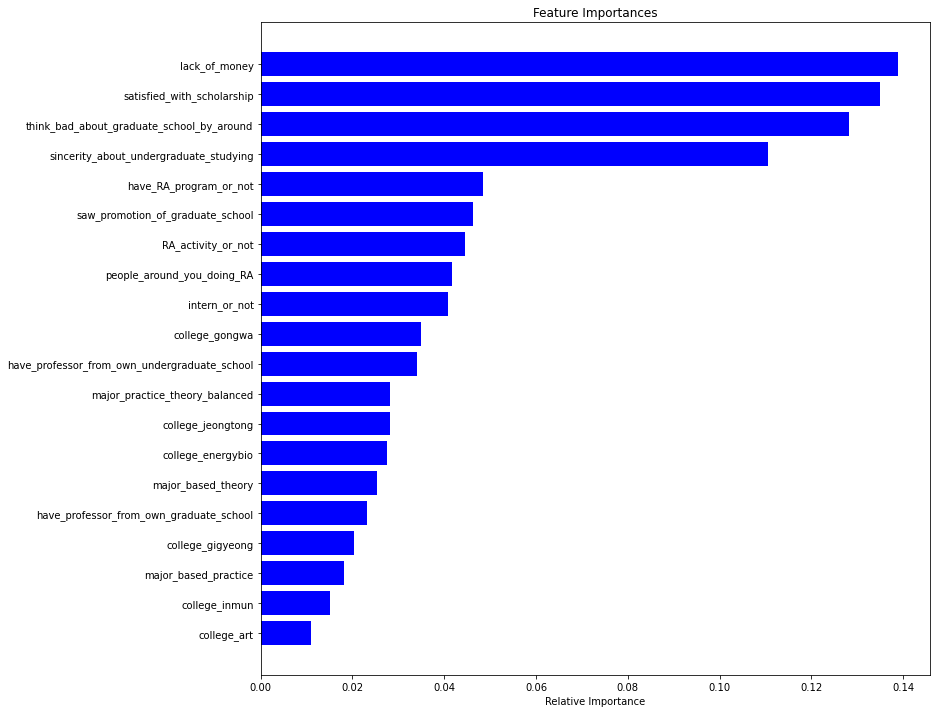

In [75]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(feature_names, rnd_clf.feature_importances_):
    print(name, "=", importance)

features = feature_names
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [52]:
X = dt_df__.loc[:, dt_df__.columns != 'plan_to_enter_graduate_school']
y = dt_df__['plan_to_enter_graduate_school']

In [53]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, len(feature_names))
print(str(len(cor_feature)), 'selected features')

28 selected features


In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=len(feature_names))
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

17 selected features


In [55]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(feature_names))
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

12 selected features


In [56]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_names, 'Pearson':cor_support,
                                     'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(feature_names))

,Feature,Pearson,Random Forest,LightGBM,Total
1,think_bad_about_graduate_school_by_myself,True,True,True,3
2,student_semester,True,True,True,3
3,sincerity_about_undergraduate_studying,True,True,True,3
4,satisfied_with_major,True,True,True,3
5,master_degree_help_get_job,True,True,True,3
6,lack_of_money,True,True,True,3
7,bad_graduate_school_because of_unclear_future,True,True,True,3
8,bad_graduate_school_because of_tuition,True,True,True,3
9,bad_graduate_school_because of_project,True,True,True,3
10,advice_by_professor,True,True,True,3


In [69]:
dt_df=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(학부생 대상)_onehot_english.csv")

In [70]:
dt_df_ = dt_df.drop('Unnamed: 0', axis=1)

In [71]:
# 전체 변수에서 feature selection만 수행
selected_feature = ['need_master_degree_for_dreamjob', 'want_job_RandD', 'master_degree_help_get_job', 'advice_by_professor', 
                    'think_bad_about_graduate_school_by_myself', 'bad_graduate_school_because of_project', 'satisfied_with_major', 
                    'satisfied_with_lecture', 'RA_activity_or_not', 'want_job_sales', 'saw_promotion_of_graduate_school', 
                    'want_job_technical'
                   ]

In [72]:
len(selected_feature)

12

In [98]:
# X, y 분리, y='석사진학계획'
X = np.array(dt_df_[selected_feature])
y = np.array(dt_df_['plan_to_enter_graduate_school'])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

need_master_degree_for_dreamjob = 0.4188107246033799
want_job_RandD = 0.21592892657027046
master_degree_help_get_job = 0.05006027462680482
advice_by_professor = 0.052995118582710866
think_bad_about_graduate_school_by_myself = 0.045108337870429824
bad_graduate_school_because of_project = 0.049192672491137644
satisfied_with_major = 0.0320146323304936
satisfied_with_lecture = 0.041684964760861073
RA_activity_or_not = 0.03366321909727347
want_job_sales = 0.033244021716644645
saw_promotion_of_graduate_school = 0.010037091466337477
want_job_technical = 0.017260015883656235


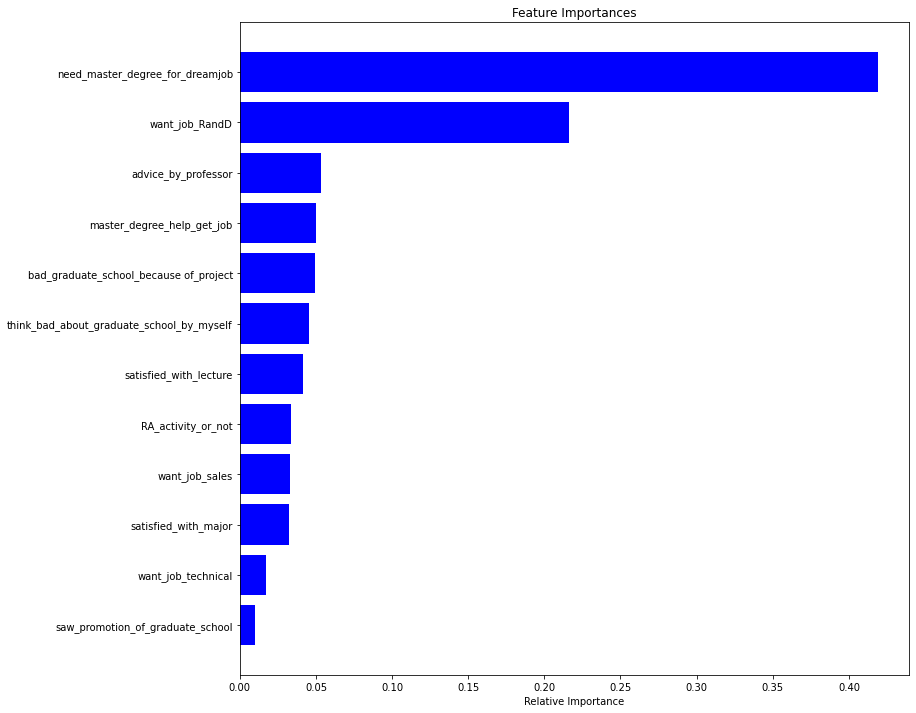

In [100]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(selected_feature, rnd_clf.feature_importances_):
    print(name, "=", importance)

features = selected_feature
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [101]:
rf_fi_df=pd.DataFrame(rnd_clf.feature_importances_, index=selected_feature, columns=['importance']).sort_values(by='importance', ascending=False)
rf_fi_df

,importance
need_master_degree_for_dreamjob,0.418811
want_job_RandD,0.215929
advice_by_professor,0.052995
master_degree_help_get_job,0.050060
bad_graduate_school_because of_project,0.049193
think_bad_about_graduate_school_by_myself,0.045108
satisfied_with_lecture,0.041685
RA_activity_or_not,0.033663
want_job_sales,0.033244
satisfied_with_major,0.032015
